# Time Series Analysis

Time series Analysis (TSA) is a method of analysing the data collected over time to identify patterns,trends and seasonal variations.It is used to forecast future values based on the historical data.

importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model  import ARIMA

Loading and Viewing data

In [6]:
tm=pd.read_csv(r"C:\Users\Megha I Angadi\Downloads\DailyDelhiClimateTrain.csv")

In [7]:
tm.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


info

In [8]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [9]:
#Checking null values

In [10]:
print(tm[tm['date'].isna()])

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


In [11]:
tm['date']=pd.to_datetime(tm['date'],errors='coerce')
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [12]:
tm.set_index('date',inplace=True)
tm.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [13]:
tm.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


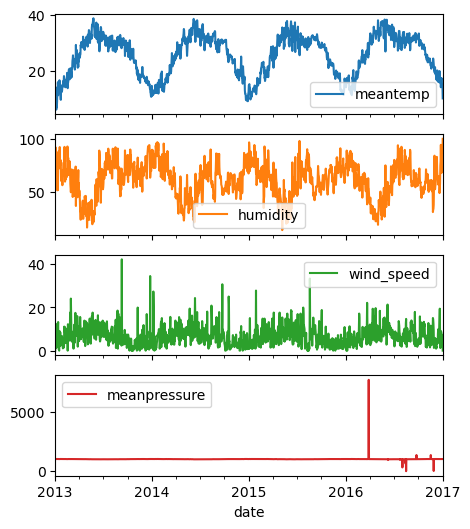

In [14]:
tm.plot(figsize=(5,6),subplots=True)
plt.show()

Conclusions:
* wind speed:there are 2 spikes between 2013 and 2014,2 spikes between 2014 and 2015,2 spikes between 2015 and 2016 and one spike between 2016 and 2017

# Stationarity

A time series is stationary if its statistical properties (mean,variance,autocorrelation) remain constant over time.

Hypothises of the ADF Test:
* Null Hypothises(H0):The time series has s unit root(i.e,it is non-stationary)).
* Alternative Hypothises(H1):The time series does not have a unit root(i.e, it is stationry)

Interpreting ADF Test Results:
* If the p-value is less than 0.05,reject the hypothises (The time series is stationary).
* If the p-value is greater than 0.05,fail to reject hypothises(The time series is non-stationary).

In [15]:
ar=adfuller(tm["meantemp"])
ar

(-2.0210690559206728,
 0.27741213723016056,
 10,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5423.895746470953)

In [16]:
if ar[1]<0.05:
    print("Stationary.")
else:
    print("Non-stationary.")

Non-stationary.


# Differencing to Remove Trend:If the series is non_stationary,apply differencing.

differencing is a technique to make nin-stationary time series stationary by removing trends or seasonality.It involves subtracting thye previous abservation from the current abservation.

 #example:
 temperature=[20,21,22,24,25,27,28,27].
 Difference=[1,1,2,1,2,1,-1].
 The new series fluctuated around zero -2 to 2.

# Differencing

In [17]:
tm["meantemp_d"]=tm["meantemp"].diff()
tm.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_d
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [18]:
ard=adfuller(tm["meantemp_d"].dropna())
if ard[1]>0.05:
    print("Non-sationary.")
else:
    print("Sationary.")

Sationary.


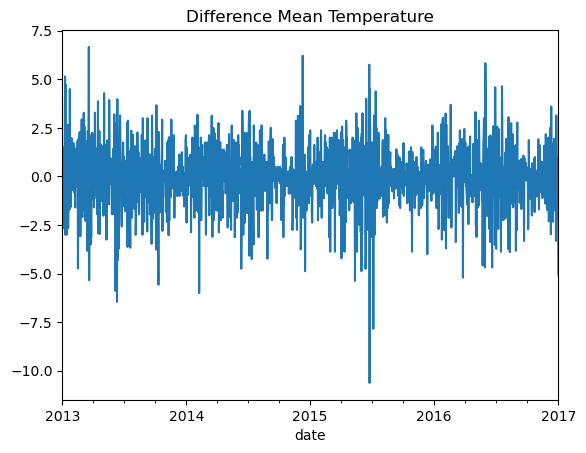

In [19]:
tm["meantemp_d"].plot(title="Difference Mean Temperature")
plt.show()

Conclusions:
* The mean Temperature is around 0.
* There are some positive spikes and some negative spikes suggesting outliers.
* between 2015 and 2016 there is an extreme negative spike(lowest temperature).
* It is Stationary that means the p-value is less than 0.05.

# Use Seasonal decomposition to analyze  trend,seasonality and residuals.

Seasonal decomposition is a technique used to break a time series into components.
- Trend-The long-term pattern(increse or decrease over time).
- Seasonality-The repeating patterns at fixed intervals(e.g.,monthly sales spike).
- Residual(Noise)- The random variations that are not explained by trend or seasonality.

Interpreting the Output:
- original series-The raw time series data.
- Trend Component-The general direction of the data over time.
- Seasonal Component-The repeating patterns(e.g.,higher sales in December).
- Residual Component-The remaining part after removing trend and seasonality.


# Decomposing

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposing=seasonal_decompose(tm["meantemp"],model="additive",period=365)
print(decomposing)

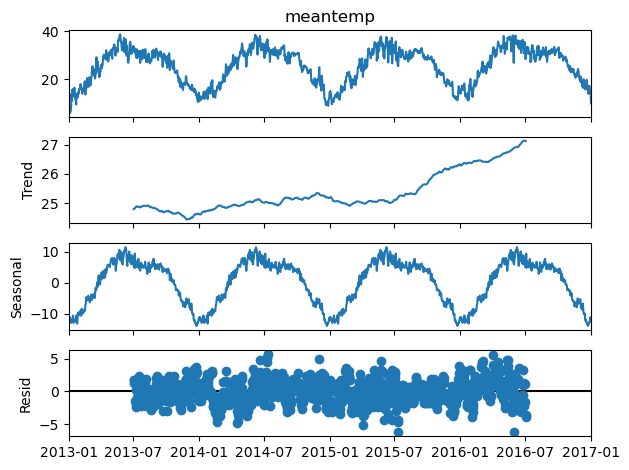

In [21]:
decomposing.plot()
plt.show()

Conclusions:
Trend:
* The lowest temperature is between 2013 and 2014.
* The temperaure is constantly increasing between 2015 and 2016.
* The hihghest temperature is between 2016/01 and 2016/07.

Seasonal:
* No constant temperature is exist.
* The lowest temperature is -10 and highest temperature is 10.

Residual:
* The mean temperature is around 0.
* There is some negative spike and some positive spkies.

# ARIMA

In [22]:
#splitting data
len(tm)

1462

In [23]:
print(len(tm)*0.80)

1169.6000000000001


In [29]:
train=tm.iloc[0:1169]
test=tm.iloc[1169:]
len(test)

293

In [26]:
mm=ARIMA(train["meantemp"],order=(1,1,1))

C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
mm=mm.fit()

In [28]:
mm

In [31]:
forecast=mm.forecast(steps=len(test))
print(forecast)

2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
                ...    
2016-12-28    23.436880
2016-12-29    23.436880
2016-12-30    23.436880
2016-12-31    23.436880
2017-01-01    23.436880
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [46]:
test.head()
test["forecast"]=forecast
test.head()

C:\Users\Megha I Angadi\AppData\Local\Temp\ipykernel_16204\2784579413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["forecast"]=forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_d,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


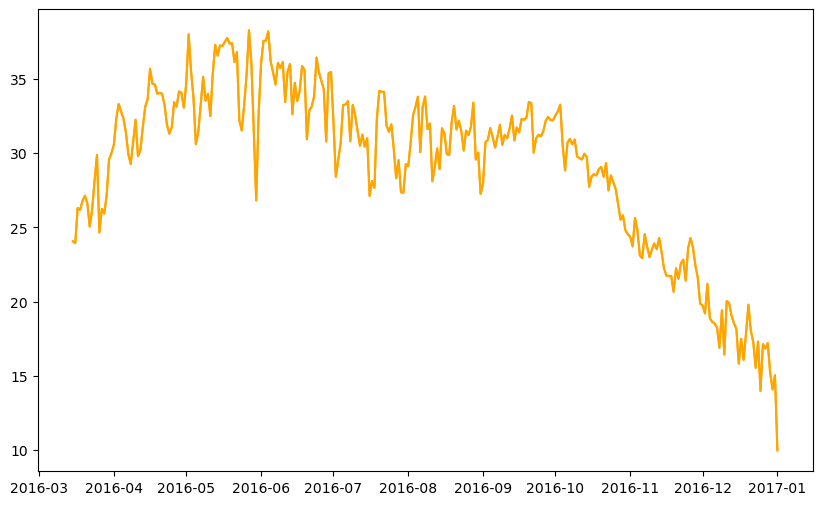

In [69]:
plt.figure(figsize=(10,6))
plt.plot(test.index,test["meantemp"],color="orange",label="original")
plt.plot(forecast.index,test["meantemp"],color="orange",label="original")

ARIMA on Difference values

In [59]:
len(tm)
print(len(tm)*0.80)

1169.6000000000001


In [60]:
train1=tm.iloc[0:1169]
test1=tm[1169:]

In [61]:
mm1=ARIMA(train1["meantemp_d"],order=(1,1,1))

C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Megha I Angadi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [63]:
mm1=mm1.fit()
mm1

In [64]:
forecast_d=mm1.forecast(steps=len(test1))
print(forecast_d)

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
                ...   
2016-12-28    0.011137
2016-12-29    0.011137
2016-12-30    0.011137
2016-12-31    0.011137
2017-01-01    0.011137
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [79]:
test1.head()
test1["forecast_d"]=tm["meantemp"].diff()
tm.head()
test1.head()

C:\Users\Megha I Angadi\AppData\Local\Temp\ipykernel_16204\2271608683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["forecast_d"]=tm["meantemp"].diff()


,meantemp,humidity,wind_speed,meanpressure,meantemp_d,forecast_d,forecast
date,,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.598214,23.370084


In [80]:
test1.head()
test1["forecast"]=forecast
test1.head()

C:\Users\Megha I Angadi\AppData\Local\Temp\ipykernel_16204\3701077959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["forecast"]=forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_d,forecast_d,forecast
date,,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.598214,23.370084


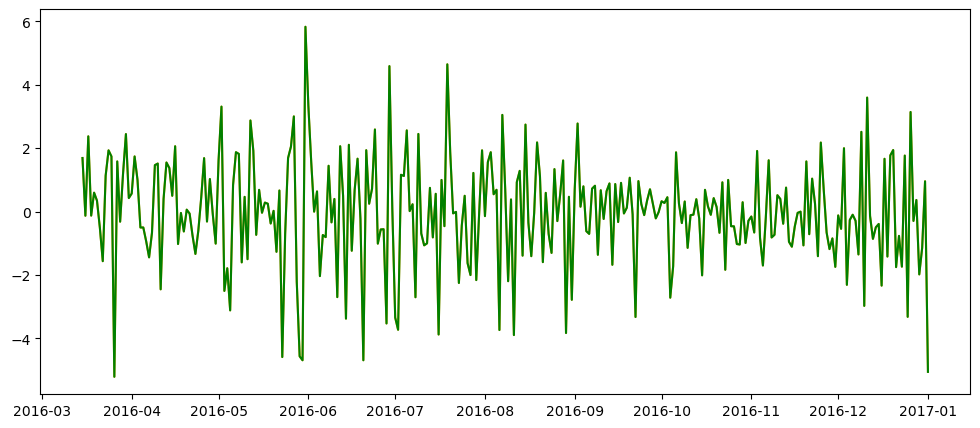

In [84]:
plt.figure(figsize=(12,5))
plt.plot(test1.index,test1["meantemp_d"],color="orange",label="original")
plt.plot(test1.index,test1["forecast_d"],color="green",label="original")
plt.title("")
plt.show()

Conclusion:
On 15th March,original value=24.0,model says there is change on the next day
24.066667-0.040038=24.02(The predicted)~23.9(original)